In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import requests
import json

In [35]:
file_dir = "%s/../datasets/tcga/BRCA/mirna/"%os.getcwd()
os.listdir(file_dir)
label = "Subtype_Selected"

In [36]:
list(map(print,pd.read_csv(f"{file_dir}/trisbm/trisbm_level_1_metadata.csv")["Metadatum 4"].values))

hsa-mir-934
hsa-mir-1295a
hsa-mir-135a-1
hsa-mir-1251
hsa-mir-516a-2
hsa-mir-516a-1
hsa-mir-517a
hsa-mir-522
hsa-mir-6507
hsa-mir-5002
hsa-mir-520f
hsa-mir-527
hsa-mir-516b-1
hsa-mir-519c
hsa-mir-4790
hsa-mir-518a-1
hsa-mir-1323
hsa-mir-520d
hsa-mir-1283-2
hsa-mir-124-1
hsa-mir-3679
hsa-mir-1283-1
hsa-mir-4431
hsa-mir-4421
hsa-mir-588
hsa-mir-523
hsa-mir-521-2
hsa-mir-6776
hsa-mir-498
hsa-mir-1246
hsa-mir-6872
hsa-mir-548x
hsa-mir-519e
hsa-mir-3529
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [37]:
df_files = pd.read_csv(f"{file_dir}/files.dat", index_col=0)

In [38]:
df_metadata = pd.read_csv(f"{file_dir}/trisbm/trisbm_level_1_metadatum-dist.csv", index_col=1).drop("i_doc", axis=1)
df_metadata = df_metadata.join(df_files.loc[:,label], how="inner")

In [39]:
df_metadata.groupby("Subtype_Selected").mean().transpose()

Subtype_Selected,BRCA.Basal,BRCA.Her2,BRCA.LumA,BRCA.LumB,BRCA.Normal
Metadatum 1,0.369667,0.379791,0.364791,0.383636,0.350351
Metadatum 2,0.531595,0.549783,0.568548,0.550280,0.575840
Metadatum 3,0.079454,0.058664,0.052669,0.052292,0.059984
Metadatum 4,0.018391,0.007521,0.008130,0.006954,0.011275
Metadatum 5,0.000478,0.004240,0.005853,0.006829,0.002485
Metadatum 6,0.000415,0.000000,0.000008,0.000009,0.000064


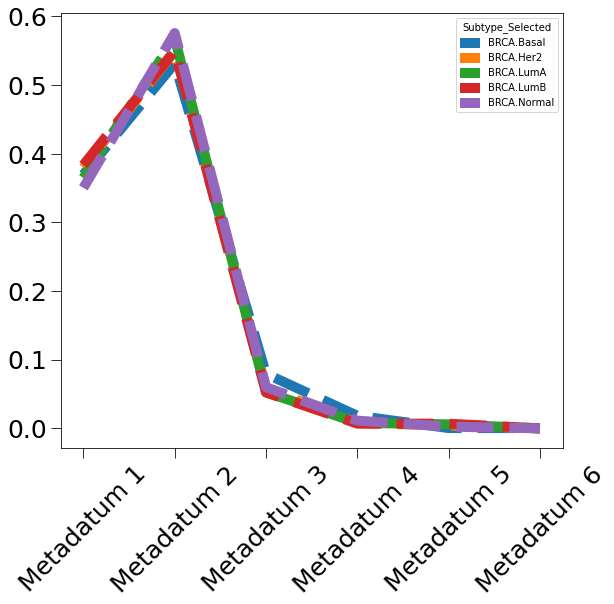

In [8]:
fig, ax= plt.subplots(figsize=(9,8))
df_metadata.groupby("Subtype_Selected").mean().transpose().plot(ax=ax, lw=10, ls="--")
ax.set_xticks(np.linspace(0, df_metadata.shape[1]-2,df_metadata.shape[1]-1))
ax.set_xticklabels(labels=df_metadata.columns[:-1], rotation=45)

ax.tick_params(labelsize=25, size=10)
plt.show()

<AxesSubplot:>

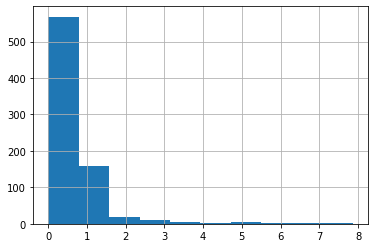

In [9]:
df_metadata_centered = df_metadata.subtract(df_metadata.mean(0),1).abs().divide(df_metadata.std(0),1)
df_metadata_centered["Metadatum 4"].hist()

In [10]:
case_set = df_metadata_centered[df_metadata_centered["Metadatum 4"]>2].index.values
list(map(print, case_set))

TCGA-E2-A1LI
TCGA-AC-A5XU
TCGA-E9-A3QA
TCGA-C8-A12W
TCGA-B6-A0X7
TCGA-GM-A3XL
TCGA-D8-A1X5
TCGA-A2-A3XX
TCGA-E2-A573
TCGA-A8-A08R
TCGA-A7-A26G
TCGA-D8-A147
TCGA-A8-A07U
TCGA-E2-A1LK
TCGA-LL-A441
TCGA-A7-A13D
TCGA-A8-A07R
TCGA-AO-A12C
TCGA-C8-A1HJ
TCGA-AR-A24L
TCGA-A7-A6VY
TCGA-EW-A3U0
TCGA-OL-A66I
TCGA-A2-A0D0
TCGA-PL-A8LZ
TCGA-D8-A1XQ
TCGA-B6-A0RT
TCGA-AC-A7VC
TCGA-PL-A8LY
TCGA-A7-A4SE
TCGA-B6-A402
TCGA-A8-A095
TCGA-AR-A1AU
TCGA-C8-A27B
TCGA-A2-A3XT


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [11]:
def get_survival(case):
    if case["cases.0.demographic.vital_status"] == 1:
        return case["cases.0.demographic.days_to_death"]
    else:
        return case["cases.0.diagnoses.0.days_to_last_follow_up"]

df_files["days_survival"] = df_files.apply(get_survival,1)

In [12]:
df_metadata_centered = df_metadata_centered.join(df_files.loc[:, "days_survival"])

In [13]:
x, y =  df_metadata.subtract(df_metadata.mean(0),1)["Metadatum 2"], df_metadata_centered["days_survival"]

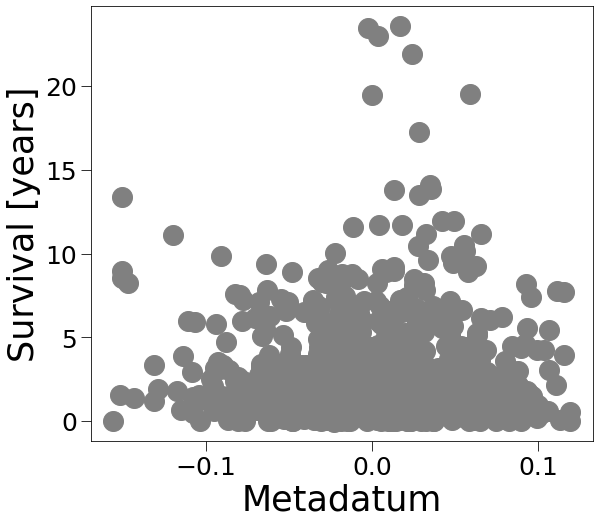

In [14]:
fig, ax = plt.subplots(figsize=(9,8))
ax.scatter(x,y/365., s=20**2, c="gray")

ax.set_xlabel("Metadatum", fontsize=35)
ax.set_ylabel("Survival [years]", fontsize=35)

ax.tick_params(labelsize=25, size=10)
plt.show()

## Search

In [15]:
##CNV filters
filters = {
    "op": "and",
    "content":[
        {
        "op": "in",
        "content":{
            "field": "files.data_type",
            "value": ["Copy Number Segment"]
            }
        },
          {
        "op": "in",
        "content":{
               "field": "files.data_category",
                "value": ["copy number variation"]
                }
        },
        {
        "op": "in",
        "content":{
            "field": "files.data_format",
            "value": ["TXT"]
            }
        },
        {
        "op": "in",
        "content":{
            "field": "cases.project.project_id",
            "value": ['TCGA-BRCA']
            }
        },
        {
        "op": "in",
        "content":{
            "field": "cases.project.program.name",
            "value": ["TCGA"]
            }
        }
        
    ]
}

In [16]:
filters = {
    "op":"and",
    "content":[
    {
   "op":"in",
   "content":{  
      "field":"case.submitter_id",
      "value": list(case_set)
   }
}]
}

In [19]:
params = {
    "filters": json.dumps(filters),
    "format": "TSV",
    "size": "50000"
    }
response = requests.get("https://api.gdc.cancer.gov/cnv_occurrences?expand=case,cnv", headers = {"Content-Type": "application/json"}, params = params)
data = [row.replace("\r","").split("\t") for row in response.content.decode("utf-8").split("\n")]
df_cnv_occurrences = pd.DataFrame(columns = data[0], data=data[1:-1]).dropna(how="all", axis=0)
response = requests.get("https://api.gdc.cancer.gov/ssm_occurrences?expand=ssm", headers = {"Content-Type": "application/json"}, params = params)
data = [row.replace("\r","").split("\t") for row in response.content.decode("utf-8").split("\n")]
df_ssm_occurrences = pd.DataFrame(columns = data[0], data=data[1:-1]).dropna(how="all", axis=0)

In [20]:
def get_gene_from_cnv_id(cnv):
    response = requests.get(f'https://api.gdc.cancer.gov/cnvs/{cnv}?pretty=true&expand=consequence.gene')
    ret = response.json()
    return ret["data"]["consequence"][0]["gene"]["gene_id"]

def get_gene_from_ssm_id(ssm):
    response = requests.get(f'https://api.gdc.cancer.gov/ssms/{ssm}?pretty=true&expand=consequence.gene')
    ret = response.json()
    if len(ret["data"]["gene_aa_change"]) < 1:
        return None
    return ret["data"]["gene_aa_change"][0].split(" ")[0]

In [21]:
df_ssm_id = df_ssm_occurrences[["ssm.ssm_id", "ssm_occurrence_id"]].groupby(["ssm.ssm_id"]).count().sort_values("ssm_occurrence_id", ascending=False)
df_ssm_id.rename(columns={"ssm_occurrence_id":"score"}, inplace=True)
print(df_ssm_id["score"].max())
ssm_ids = df_ssm_id[df_ssm_id["score"]>1].index
print(len(ssm_ids), "ssm.cnv_id")

3
7 ssm.cnv_id


In [22]:
df_cnv_id = df_cnv_occurrences[["cnv.cnv_id", "cnv_occurrence_id"]].groupby(["cnv.cnv_id"]).count().sort_values("cnv_occurrence_id", ascending=False)
df_cnv_id.rename(columns={"cnv_occurrence_id":"score"}, inplace=True)
print(df_cnv_id["score"].max())
cnv_ids = df_cnv_id[df_cnv_id["score"]>9].index
print(len(cnv_ids), "cnv.cnv_id")

14
61 cnv.cnv_id


In [23]:
get_gene_from_cnv_id(cnv_ids[0])

'ENSG00000104490'

In [24]:
get_gene_from_ssm_id(ssm_ids[0])

In [25]:
import multiprocessing as mp
from time import time

start = time()

gene_list = []
gene_list_from_ssm = []

def append_gene(g):
    global gene_list
    if g is not None:
        gene_list.append(g)
    
def append_gene_from_ssm(g):
    global gene_list_from_ssm
    if g is not None:
        gene_list_from_ssm.append(g)
    
pool = mp.Pool(2)
w = [pool.apply_async(get_gene_from_cnv_id, args=([cnv_id]), callback=append_gene, error_callback=lambda err: print(err)) for cnv_id in cnv_ids]
pool.close()

poolssm = mp.Pool(2)
wssm = [poolssm.apply_async(get_gene_from_ssm_id, args=([ssm_id]), callback=append_gene_from_ssm, error_callback=lambda err: print(err)) for ssm_id in ssm_ids]
poolssm.close()


pool.join()
poolssm.join()


time()-start

19.38520836830139

In [26]:
list(map(print,gene_list_from_ssm))

RP1L1
TP53
SLC43A1


[None, None, None]

In [27]:
list(map(print,gene_list))

ENSG00000272058
ENSG00000104490
ENSG00000258465
ENSG00000177628
ENSG00000180433
ENSG00000159455
ENSG00000143365
ENSG00000143368
ENSG00000244094
ENSG00000143363
ENSG00000143318
ENSG00000188092
ENSG00000198965
ENSG00000155090
ENSG00000163472
ENSG00000163207
ENSG00000198835
ENSG00000143590
ENSG00000143224
ENSG00000143740
ENSG00000196266
ENSG00000182898
ENSG00000184489
ENSG00000196189
ENSG00000172164
ENSG00000273088
ENSG00000236334
ENSG00000198929
ENSG00000198837
ENSG00000203786
ENSG00000156795
ENSG00000183856
ENSG00000118217
ENSG00000027869
ENSG00000184270
ENSG00000254706
ENSG00000184678
ENSG00000159339
ENSG00000198715
ENSG00000173110
ENSG00000278939
ENSG00000143248
ENSG00000163155
ENSG00000179698
ENSG00000163344
ENSG00000156787
ENSG00000143303
ENSG00000122224
ENSG00000198967
ENSG00000187701
ENSG00000203814
ENSG00000162738
ENSG00000118298
ENSG00000178764
ENSG00000176444
ENSG00000163468
ENSG00000125459
ENSG00000132196
ENSG00000279261
ENSG00000187800
ENSG00000163191


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [42]:
with open("%strisbm|metadatum4|l1/oncogrid.json"%file_dir, "r") as file:
    oncogrid = json.loads(file.read())

In [43]:
oncogrid.keys()

dict_keys(['genes', 'ssm_occurrences', 'cnv_occurrences', 'cases', 'totalCases'])

In [44]:
onco_genes = pd.read_json(json.dumps(oncogrid["genes"]))
onco_genes.head()

,symbol,is_cancer_gene_census,gene_id,_score
0,TP53,true,ENSG00000141510,21
1,RB1,true,ENSG00000139687,3
2,FBXW7,true,ENSG00000109670,3
3,RNF213,true,ENSG00000173821,3
4,SETBP1,true,ENSG00000152217,2


In [45]:
for g in onco_genes[onco_genes["_score"]>1]["symbol"]:
    print(g)

TP53
RB1
FBXW7
RNF213
SETBP1
NDRG1
PIK3CA
KMT2A
STAG2
KMT2D
PAX3
POLE
PAX5
UBR5
EP300
NOTCH1
CACNA1D
TPR


In [46]:
pd.read_json(json.dumps(oncogrid["cnv_occurrences"]))["cnv"]

0      {'consequence': [{'gene': {'gene_id': 'ENSG000...
1      {'consequence': [{'gene': {'gene_id': 'ENSG000...
2      {'consequence': [{'gene': {'gene_id': 'ENSG000...
3      {'consequence': [{'gene': {'gene_id': 'ENSG000...
4      {'consequence': [{'gene': {'gene_id': 'ENSG000...
                             ...                        
340    {'consequence': [{'gene': {'gene_id': 'ENSG000...
341    {'consequence': [{'gene': {'gene_id': 'ENSG000...
342    {'consequence': [{'gene': {'gene_id': 'ENSG000...
343    {'consequence': [{'gene': {'gene_id': 'ENSG000...
344    {'consequence': [{'gene': {'gene_id': 'ENSG000...
Name: cnv, Length: 345, dtype: object

In [47]:
len(cnv_ids)

61